In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('monthly-car-sales.csv')

In [3]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [4]:
df.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [5]:
df.shape

(108, 2)

<Axes: >

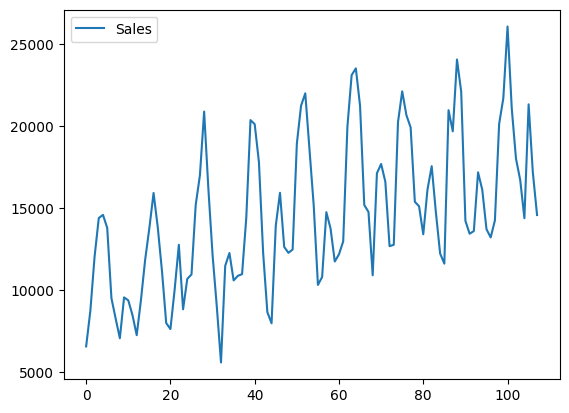

In [6]:
df.plot()

In [7]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
from prophet import Prophet

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [9]:
model = Prophet()

In [10]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [11]:
future = list()

In [12]:
for i in range(1,13):
    date = '1969-%02d'%i
    future.append([date])

In [13]:
future

[['1969-01'],
 ['1969-02'],
 ['1969-03'],
 ['1969-04'],
 ['1969-05'],
 ['1969-06'],
 ['1969-07'],
 ['1969-08'],
 ['1969-09'],
 ['1969-10'],
 ['1969-11'],
 ['1969-12']]

In [13]:
future = pd.DataFrame(future)

In [14]:
future.columns = ['ds']

In [15]:
future['ds'] = pd.to_datetime(future['ds'])

In [16]:
forecast = model.predict(future)

In [17]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15402.026282  13831.312425  16928.412102
1 1969-02-01  16160.816555  14518.477481  17728.238246
2 1969-03-01  21367.885535  19970.158770  22866.121343
3 1969-04-01  23502.093201  21978.142778  25016.503901
4 1969-05-01  25016.996626  23447.771836  26624.822957


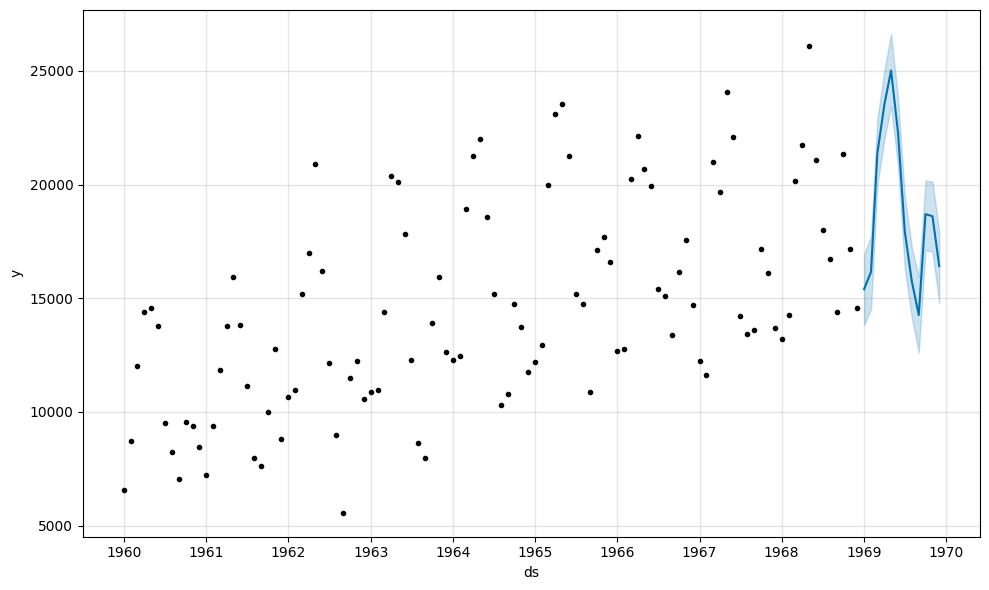

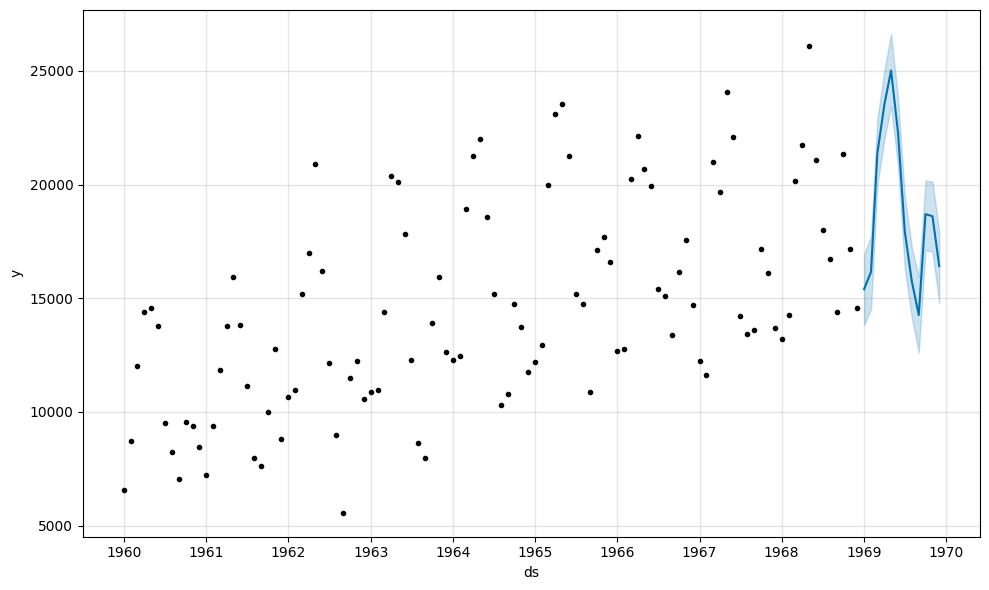

In [18]:
model.plot(forecast)

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
train = df.drop(df.index[-12:])

In [21]:
for i in range(1,13):
    date = '1968-%02d'%i
    future.append([date])

/var/folders/cm/77wd3wlj2vq84sf8r4wmcm0h0000gn/T/ipykernel_4966/1920140649.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future.append([date])
/var/folders/cm/77wd3wlj2vq84sf8r4wmcm0h0000gn/T/ipykernel_4966/1920140649.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future.append([date])
/var/folders/cm/77wd3wlj2vq84sf8r4wmcm0h0000gn/T/ipykernel_4966/1920140649.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future.append([date])
/var/folders/cm/77wd3wlj2vq84sf8r4wmcm0h0000gn/T/ipykernel_4966/1920140649.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future.append([date])
/var/folders/cm/77wd3wlj2vq84sf8r4wmcm0h0000gn/T

In [22]:
future = pd.DataFrame(future)

future.columns = ['ds']

future['ds'] = pd.to_datetime(future['ds'])

In [23]:
forecast = model.predict(future)

In [24]:
y_true = df['y'][-12:].values

In [25]:
y_pred = forecast['yhat'].values

In [26]:
mae = mean_absolute_error(y_true, y_pred)

In [27]:
print('MAE: %.3f' % mae)

MAE: 1372.113


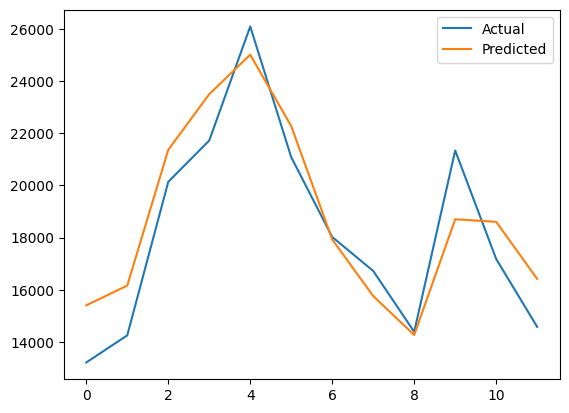

In [28]:
plt.plot(y_true, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.show()